# Titanic Survival Prediction
This is a Data Science that predicts the survival of passengers on the Titanic based on their characteristics.

In [1]:


import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
Titanicdf=pd.read_csv("train.csv")

In [5]:
Titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Titanicdf.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
Titanicdf.shape

(891, 12)

In [7]:
Titanicdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
Titanicdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
Titanicdf["Age"].fillna(Titanicdf["Age"].mean(),inplace=True)
Titanicdf["Embarked"].fillna(Titanicdf["Embarked"].mode()[0],inplace=True)

C:\Users\amitg\AppData\Local\Temp\ipykernel_5028\657505698.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Titanicdf["Age"].fillna(Titanicdf["Age"].mean(),inplace=True)
C:\Users\amitg\AppData\Local\Temp\ipykernel_5028\657505698.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [10]:
Titanicdf.drop(columns="Cabin",axis=1,inplace=True)

In [11]:
Titanicdf.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Visualization

In [12]:
Titanicdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [14]:
gender = Titanicdf['Sex'].value_counts()
gender

Sex
male      577
female    314
Name: count, dtype: int64

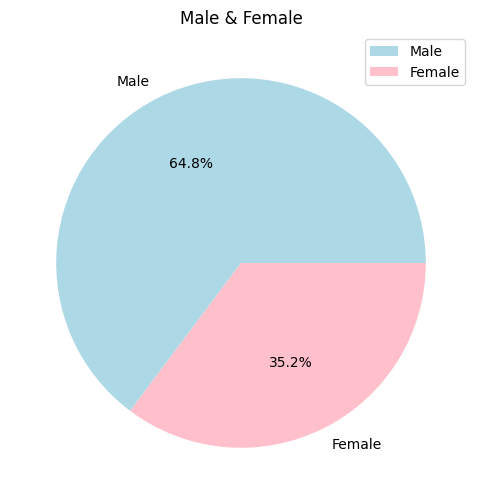

In [15]:
plt.figure(figsize=(10,6))
plt.pie(gender, labels=['Male', 'Female'] ,autopct='%.1f%%', colors=['lightblue','pink'])
plt.legend()
plt.title('Male & Female')
plt.show()

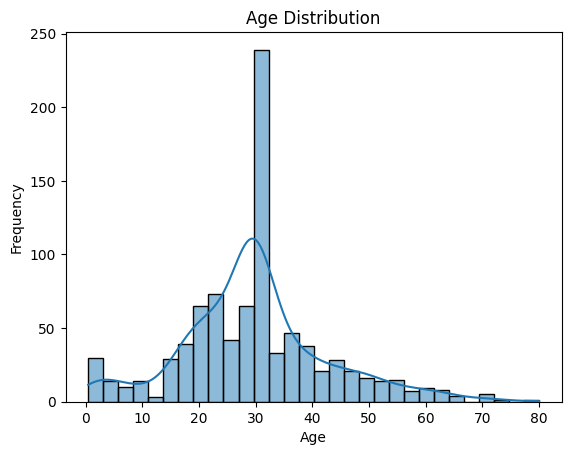

In [16]:
sns.histplot(data=Titanicdf, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

data distribution analysys


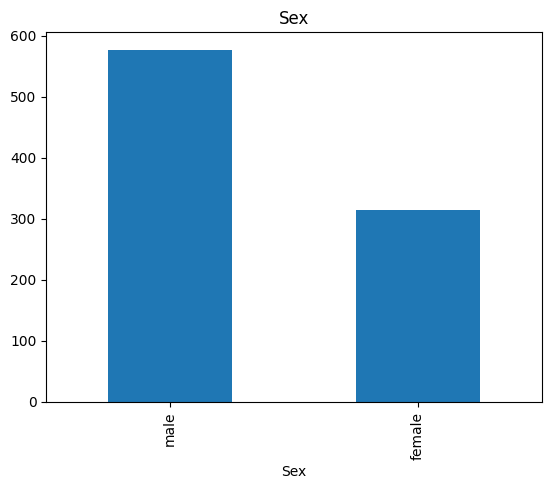

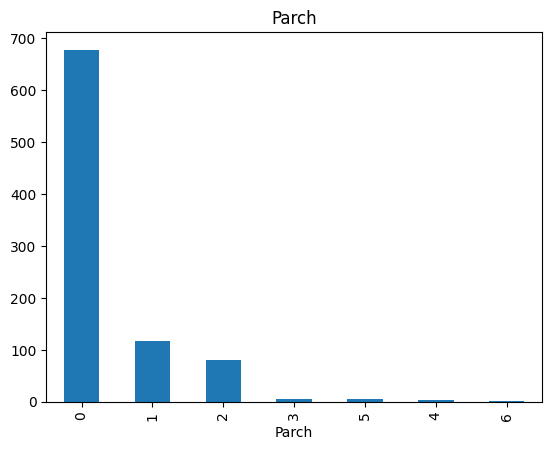

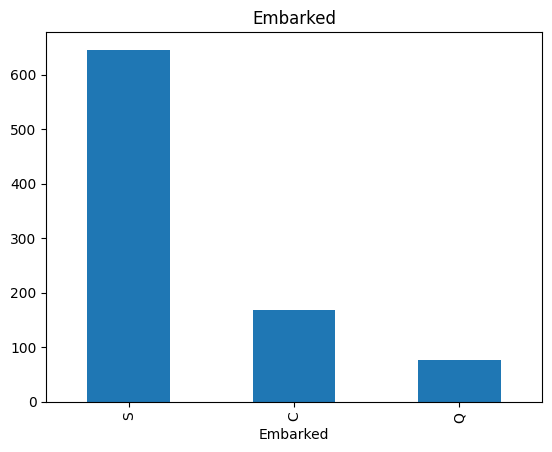

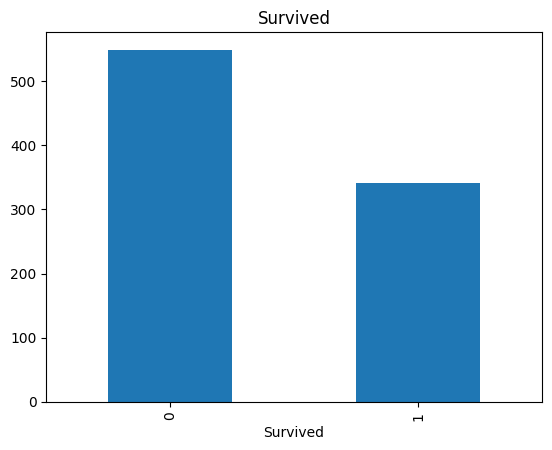

data distribution analysis


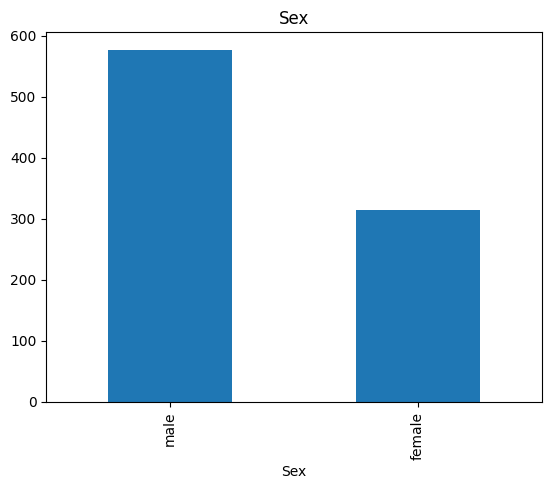

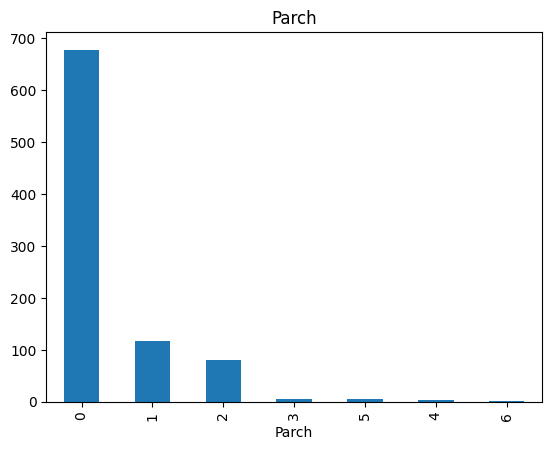

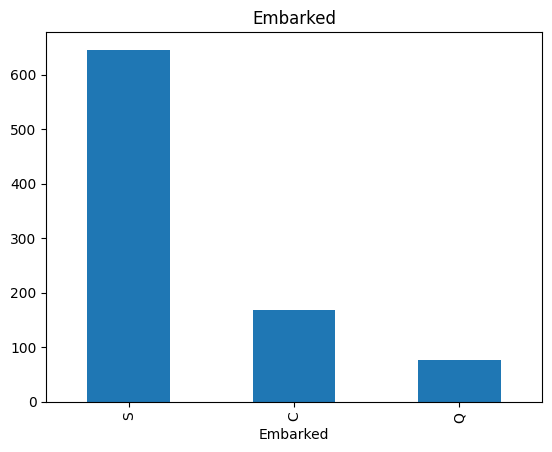

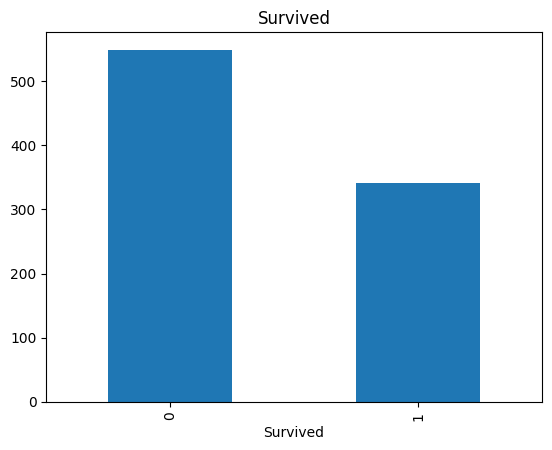

In [19]:
 # of parents / children aboard the Titanic fare Passenger fare
 #embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
 #survival Survival 0 = No, 1 = Yes

varibales=['Sex', 'Parch', 'Embarked','Survived']
print("data distribution analysys")
for v in varibales :
  Titanicdf=Titanicdf.sort_values(by=v)
  Titanicdf[v].value_counts().plot(kind="bar")
  plt.title(v)
  plt.show()
  varibales=['Sex', 'Parch', 'Embarked','Survived']
print("data distribution analysis")
for v in varibales :
  Titanicdf=Titanicdf.sort_values(by=v)
  Titanicdf[v].value_counts().plot(kind="bar")
  plt.title(v)
  plt.show()

<Axes: xlabel='Sex', ylabel='count'>

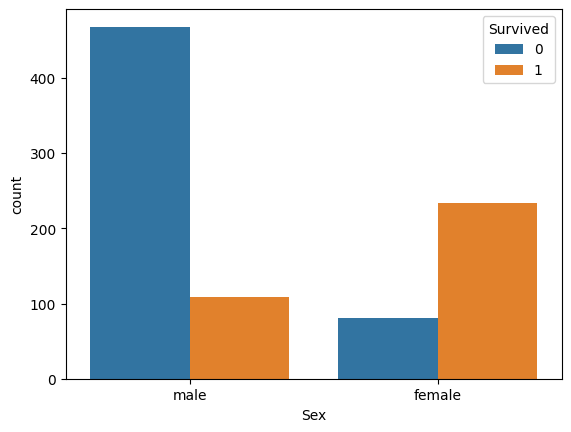

In [20]:
sns.countplot(x='Sex', hue='Survived', data=Titanicdf)


<Axes: xlabel='Pclass', ylabel='count'>

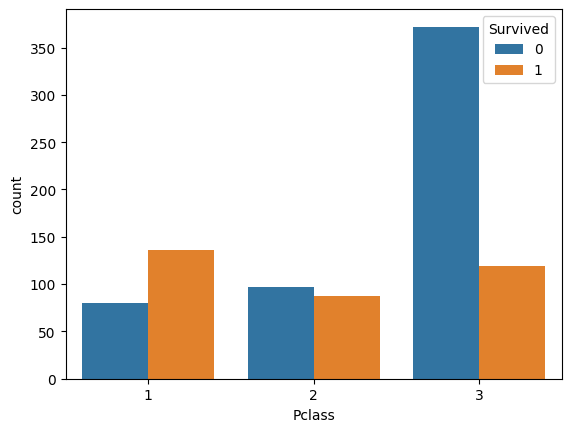

In [21]:
sns.countplot(x='Pclass', hue='Survived', data=Titanicdf)

<Axes: xlabel='Embarked', ylabel='count'>

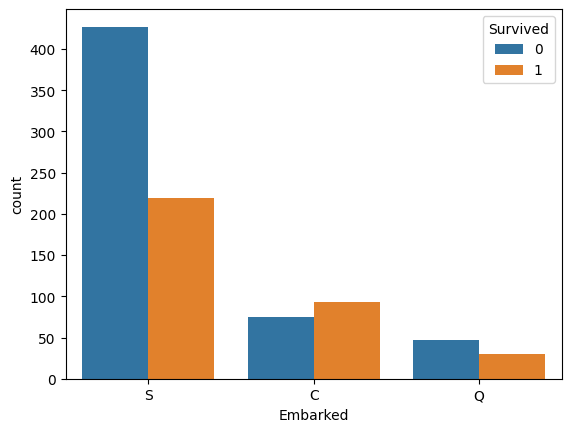

In [22]:
sns.countplot(x='Embarked', hue='Survived', data=Titanicdf)

In [23]:
Titanicdf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Variables pairplot:


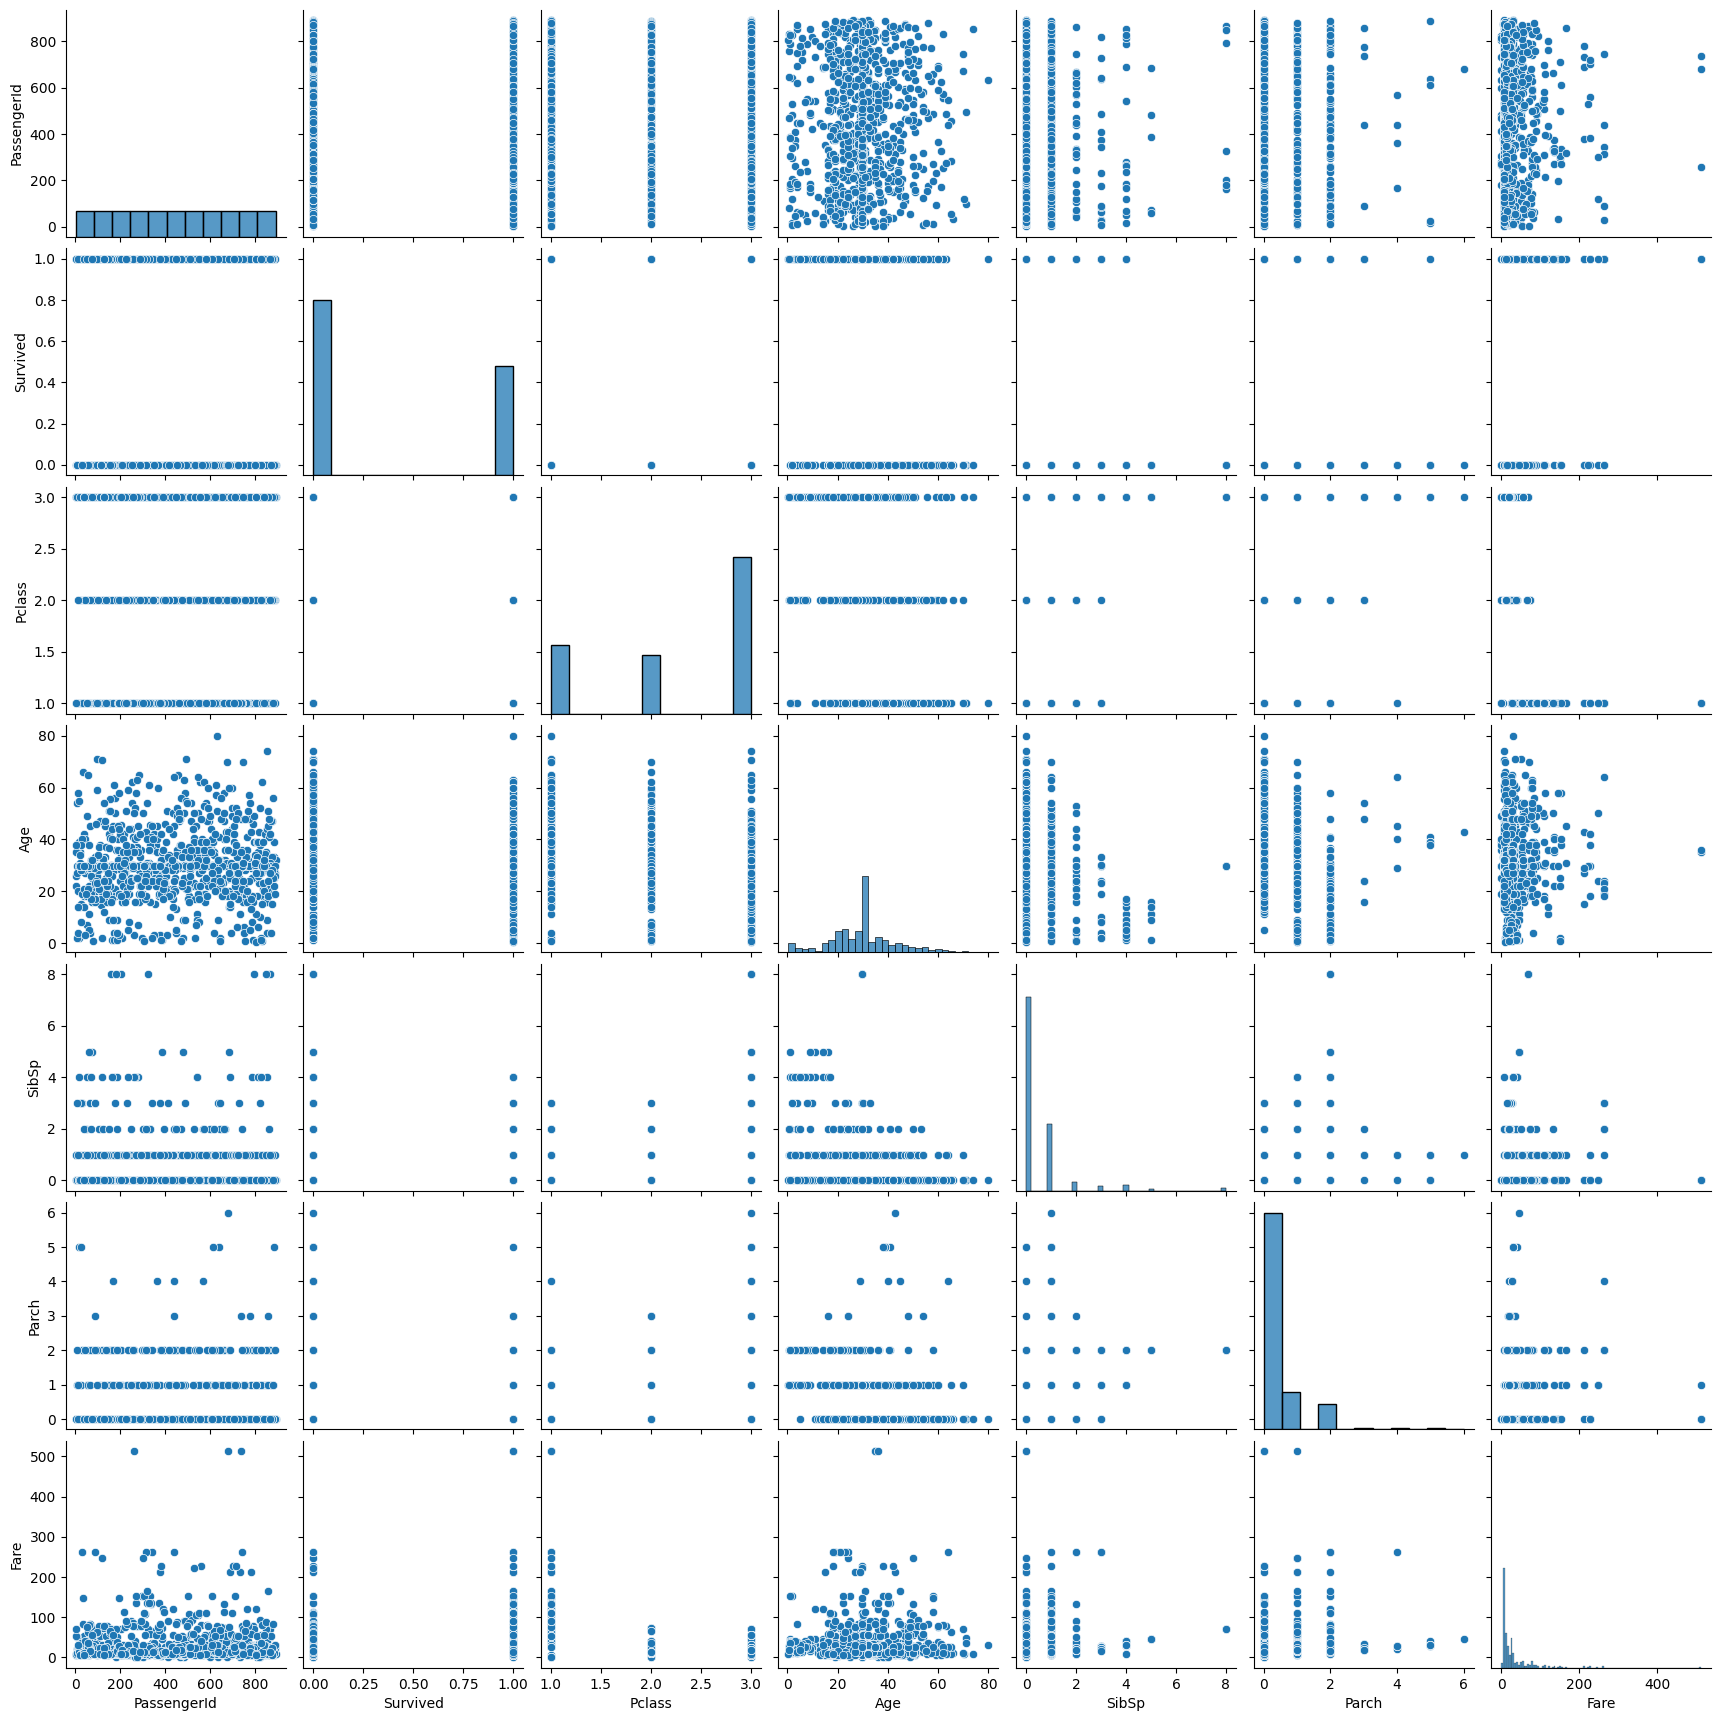

In [24]:
#variables pairplot
print('Variables pairplot:')
variables = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']
sns_plot = sns.pairplot(Titanicdf[variables])
plt.show()

In [25]:
en=LabelEncoder()

Titanicdf["Sex"]=en.fit_transform(Titanicdf["Sex"])
Titanicdf["Embarked"]=en.fit_transform(Titanicdf["Embarked"])
Titanicdf["Ticket"]=en.fit_transform(Titanicdf["Ticket"])

In [26]:
Titanicdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 210 to 288
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 83.5+ KB


In [27]:
x=Titanicdf.drop(columns=['PassengerId','Name',"Survived"],axis=1)
y=Titanicdf["Survived"]

In [28]:
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
210,3,1,24.00,0,0,642,7.0500,2
83,1,1,28.00,0,0,25,47.1000,2
861,2,1,21.00,1,0,221,11.5000,2
80,3,1,22.00,0,0,304,9.0000,2
696,3,1,44.00,0,0,425,8.0500,2
...,...,...,...,...,...,...,...,...
581,1,0,39.00,1,1,83,110.8833,0
299,1,0,50.00,0,1,585,247.5208,0
469,3,0,0.75,2,1,194,19.2583,0
448,3,0,5.00,2,1,194,19.2583,0


In [29]:
y

210    0
83     0
861    0
80     0
696    0
      ..
581    1
299    1
469    1
448    1
288    1
Name: Survived, Length: 891, dtype: int64

### spiliting data into trained data test

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

Model Gradient Boosting classifier

In [33]:
model_Titanic=gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
model_Titanic.fit(x_train,y_train)
train_predict=model_Titanic.predict(x_train)
test_predict=model_Titanic.predict(x_test)

In [34]:
#Train acc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, train_predict))
print(confusion_matrix(y_train,  train_predict))
print(classification_report(y_train, train_predict))

0.8792134831460674
[[413  26]
 [ 60 213]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       439
           1       0.89      0.78      0.83       273

    accuracy                           0.88       712
   macro avg       0.88      0.86      0.87       712
weighted avg       0.88      0.88      0.88       712



In [35]:
# Test acc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, test_predict))
print(confusion_matrix(y_test,  test_predict))
print(classification_report(y_test, test_predict))

0.8268156424581006
[[102   8]
 [ 23  46]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       110
           1       0.85      0.67      0.75        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179

